In [65]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Load the cleaned data

In [66]:
df = pd.read_csv('data/sales_clean.csv')
df.head(5)

,discounted_price,actual_price,discount_percentage,rating,rating_count
0,0.004618,0.007579,0.64,4,0.056835
1,0.002053,0.002216,0.43,4,0.103033
2,0.002053,0.013299,0.90,3,0.018563
3,0.003720,0.004719,0.53,4,0.221001
4,0.001475,0.002574,0.61,4,0.039588


In [67]:
X = df.drop('rating',axis=1).values
X

array([[0.00461829, 0.00757895, 0.64      , 0.05683524],
       [0.00205257, 0.00221649, 0.43      , 0.10303276],
       [0.00205257, 0.01329892, 0.9       , 0.01856332],
       ...,
       [0.02796629, 0.02174302, 0.28      , 0.00109141],
       [0.01744686, 0.01323457, 0.26      , 0.01880456],
       [0.03622789, 0.02610449, 0.22      , 0.01635942]])

In [68]:
y = df['rating'].values
y

array([4, 4, 3, ..., 3, 4, 4])

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


In [70]:
model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7747440273037542


Confusion Matrix

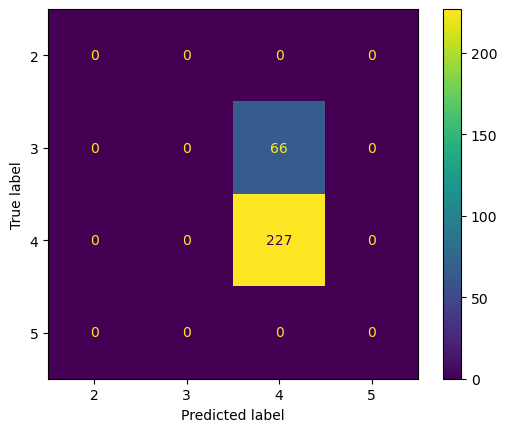

In [71]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred, labels = model.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.savefig('img/naive_cm.png')
plt.show()